### Mehmet Doğukan Hiçyılmaz
### CMPE442 - Machine Learning  Assignment 2

    Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
    Prediction task is to determine whether a person makes over 50K a year.
    Dataset is from https://archive.ics.uci.edu/dataset/2/adult

In [1]:
#Necessary Libraries
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
df = pd.read_csv('adult.csv')
print("Adult dataset in row and column:", df.shape)

Adult dataset in row and column: (32561, 15)


The adult dataset consists of 32,561 rows and 15 columns.

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


 Brief explanation of each feature that I choose for this assignment:

1. **age**: Age of the individual (continuous).
2. **workclass**: The type of employment, such as Private, Self-emp-not-inc, etc.
3. **education**: The highest level of education achieved by the individual, ranging from Preschool to Doctorate.
4. **education-num**: The numerical representation of education, which likely corresponds to the number of years of education (continuous).
5. **marital-status**: Marital status of the individual, including categories like Married-civ-spouse, Divorced, Never-married, etc.
6. **occupation**: The type of occupation the individual is engaged in, such as Tech-support, Craft-repair, etc.
7. **relationship**: Relationship status of the individual, including categories like Wife, Own-child, Husband, etc.
8. **race**: Ethnicity or race of the individual, including categories like White, Black, Asian-Pac-Islander, etc.
9. **sex**: Gender of the individual, either Female or Male.
10. **capital-gain**: Continuous variable representing the capital gains of the individual.
11. **capital-loss**: Continuous variable representing the capital losses of the individual.
12. **hours-per-week**: The number of hours worked per week (continuous).
13. **native-country**: The country of origin of the individual, including categories like United-States, India, Mexico, etc.
14. **fnlwgt**: A continuous variable representing the weights on the CPS files, which are controlled to independent estimates of the civilian noninstitutional population of the US.
    
****This overview provides a basic understanding of the dataset's features and their descriptions.

The task at hand entails leveraging census data to predict whether an individual's income surpasses $50,000 annually. This prediction aims to discern whether a person's earnings exceed the specified threshold. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.describe().T #i am describing the data by tranposing

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## Data Exploration

In [8]:
# Checking for missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [9]:
def explore_data(df):
    print("Column:")
    print(df.columns)
    print("\n")
    
    print("Types of data:")
    print(df.dtypes)
    print("\n")
    
    print("Numerical columns' statistics:")
    print(df.describe())
    print("\n")
    
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"Unique values for {col}:")
        print(f"-----------------------------------------")
        print(df[col].value_counts())
        print("\n")
    
    print("Missing values number:", df.isnull().sum())


In [10]:
explore_data(df)

Column:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


Types of data:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


Numerical columns' statistics:
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.29208

**Native.Country, Occupation, Workclass** has unknown values represented by ?

**Education**
- 9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
- Create Elementary object for 1st-4th, 5th-6th, 7th-8th

**Marital Status**
- Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married
- Divorced, separated again comes under category separated.

**Workclass**
- Self-emp-not-inc, Self-emp-inc comes under category self employed
- Local-gov,State-gov,Federal-gov comes under category goverment emloyees 
     


In [11]:
# Handling unknown values represented by '?'
df['native.country'] = df['native.country'].replace('?', 'Unknown')
df['occupation'] = df['occupation'].replace('?', 'Unknown')
df['workclass'] = df['workclass'].replace('?', 'Unknown')

In [12]:
#Separating categorical and numerical columns
categorical_col = df.dtypes[df.dtypes == 'object']
numerical_col = df.dtypes[df.dtypes != 'object']

In [13]:
# Education
df['education'] = df['education'].replace(['9th', '10th', '11th', '12th'], 'High School Grad')
df['education'] = df['education'].replace(['1st-4th', '5th-6th', '7th-8th'], 'Elementary')

# Marital Status
df['marital.status'] = df['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
df['marital.status'] = df['marital.status'].replace(['Divorced', 'Separated'], 'Separated')

# Workclass
df['workclass'] = df['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self Employed')
df['workclass'] = df['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], 'Government Employees')

#### I have simplified and grouped similar categories in the "Education," "Marital Status," and "Workclass" columns to make the dataset more manageable and conducive to analysis.

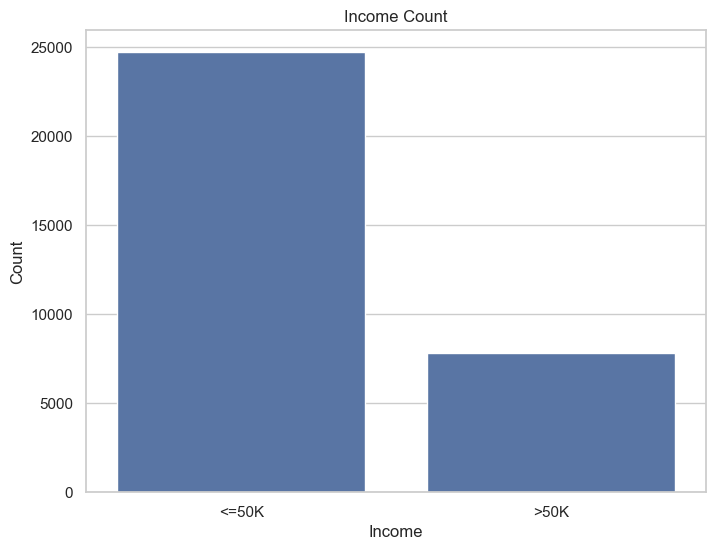

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income')
plt.title('Income Count')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

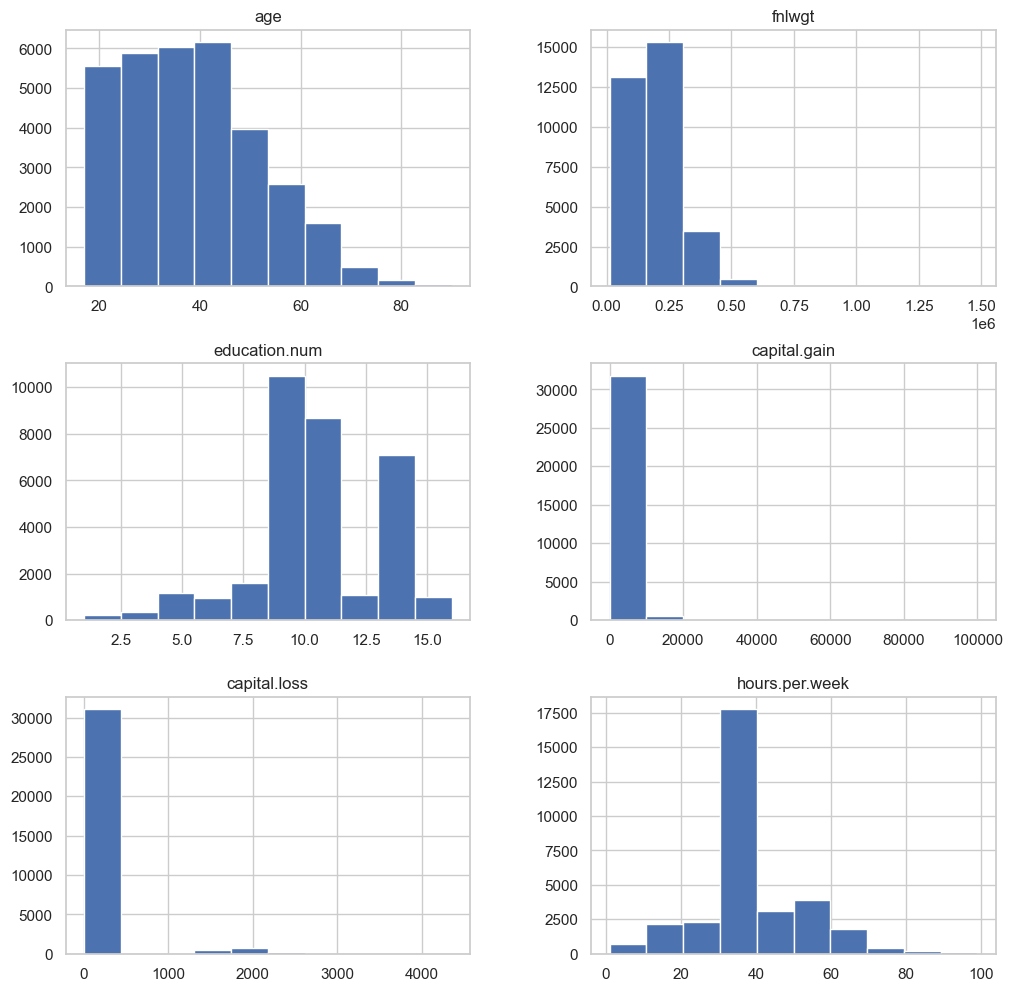

In [16]:
# Plot histograms for numerical columns
num_col_list = list(numerical_col.index)
df[num_col_list].hist(figsize=(12, 12))
plt.show()

- `age`: Individuals between the ages of 18 and 50 can be found in our dataset.
- `hours per week`: people work between 30 and 40 hours a week.
- `education`: our dataset contains a higher proportion of individuals with more education than the eighth grade.
- I should think about scaling our highly skewed dataset in order to improve the performance of my models.

I'll investigate further those who have capital gains or losses that exceed zero.

In [17]:
capital_loss_df = df[df['capital.loss'] > 0] #filtering
capital_gain_df = df[df['capital.gain'] > 0]

# Calculating the percentage of people with capital gain and loss greater than zero
percentage_capital_gain = (capital_gain_df.shape[0] / df.shape[0]) * 100
percentage_capital_loss = (capital_loss_df.shape[0] / df.shape[0]) * 100

print(f"The count of observations where the capital loss exceeds zero: {capital_loss_df.shape[0]}")
print(f"The count of observations where the capital gain is more than zero: {capital_gain_df.shape[0]}")
print(f"Percentage of persons with capital gains above zero: {percentage_capital_gain:.2f}%")
print(f"Percentage of individuals experiencing a capital loss that is not zero: {percentage_capital_loss:.2f}%")


The count of observations where the capital loss exceeds zero: 1519
The count of observations where the capital gain is more than zero: 2712
Percentage of persons with capital gains above zero: 8.33%
Percentage of individuals experiencing a capital loss that is not zero: 4.67%


- Percentage of persons with capital gains above zero: 8.33% indicates that 92% of people have capital gains that are zero.

    - Capital loss and gain are both possible to be zero.
    - There is a chance that capital loss will be large or greater than zero if capital.gain is zero.



In [18]:
df.loc[df['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


- There is an outlier whic is understand from maximum value of capital gain,99999, above 75% quartile range.

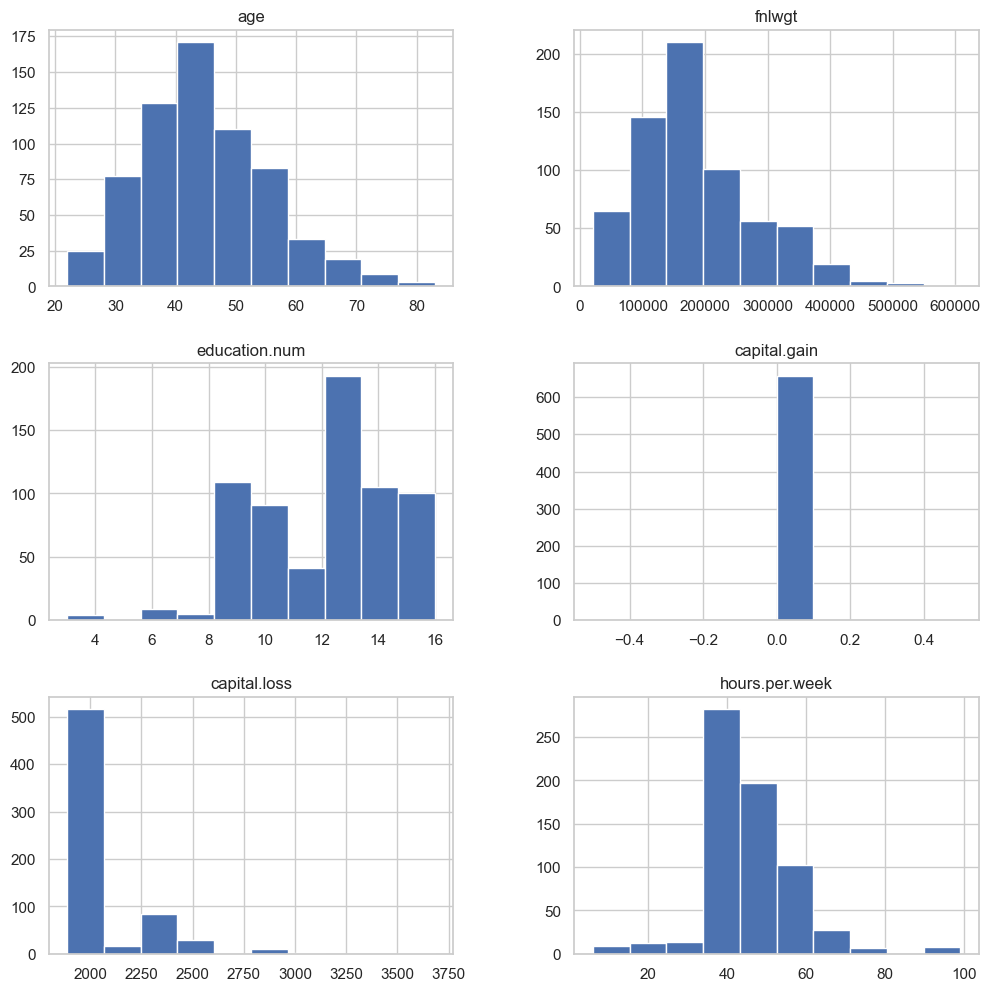

In [19]:
#characteristics of individuals whose income exceeds $50,000 and whose capital loss exceeds the mean value.
filtered_df = df[(df['capital.loss'] >= 1871) & (df['income'] == '>50K')]
filtered_df.hist(figsize=(12, 12))
plt.show()

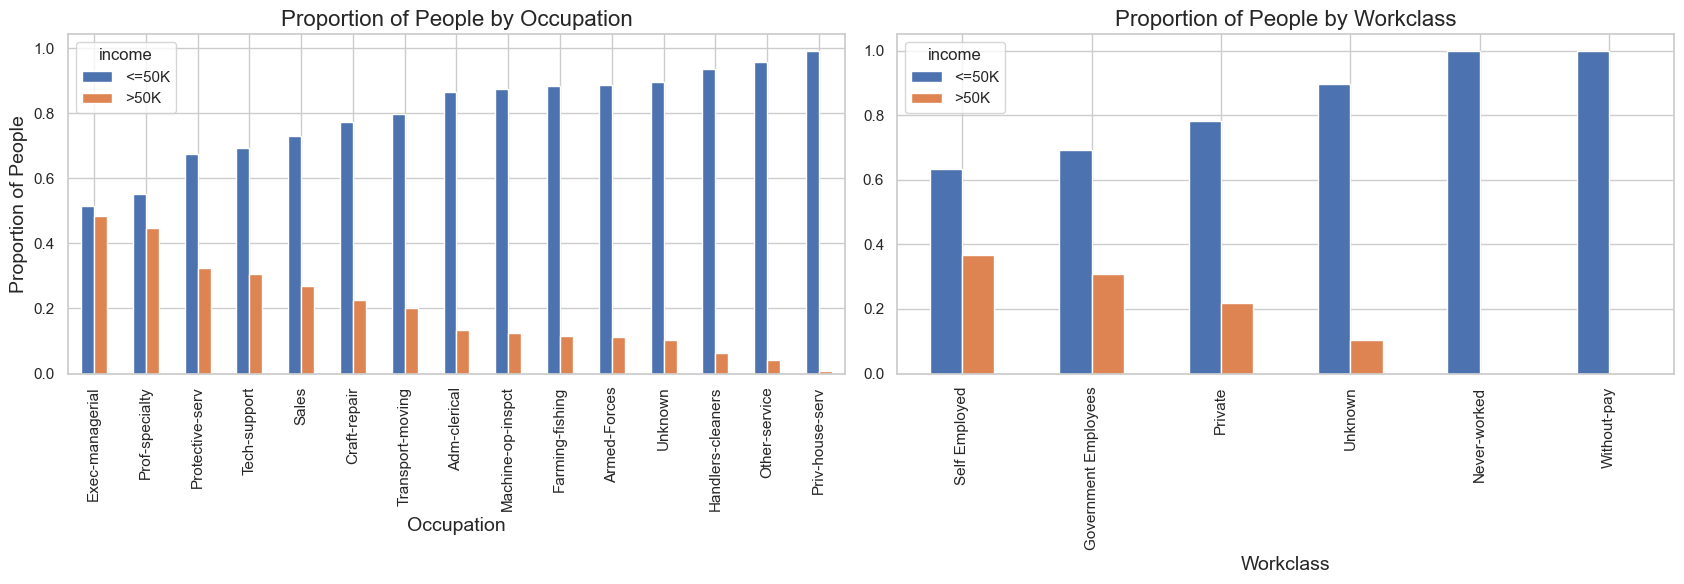

In [20]:
occu = pd.crosstab(df['occupation'], df['income'])
workclass = pd.crosstab(df['workclass'], df['income'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

# Plot for occupation
ax1 = occu.div(occu.sum(axis=1), axis=0).sort_values(by='<=50K').plot(kind='bar', ax=axes[0])
ax1.set_xlabel("Occupation", fontsize=14)
ax1.set_ylabel("Proportion of People", fontsize=14)
ax1.set_title("Proportion of People by Occupation", fontsize=16)

# Plot for workclass
ax2 = workclass.div(workclass.sum(axis=1), axis=0).sort_values(by='<=50K').plot(kind='bar', ax=axes[1])
ax2.set_xlabel("Workclass", fontsize=14)
ax2.set_ylabel("")  
ax2.set_title("Proportion of People by Workclass", fontsize=16)

plt.tight_layout()
plt.show()


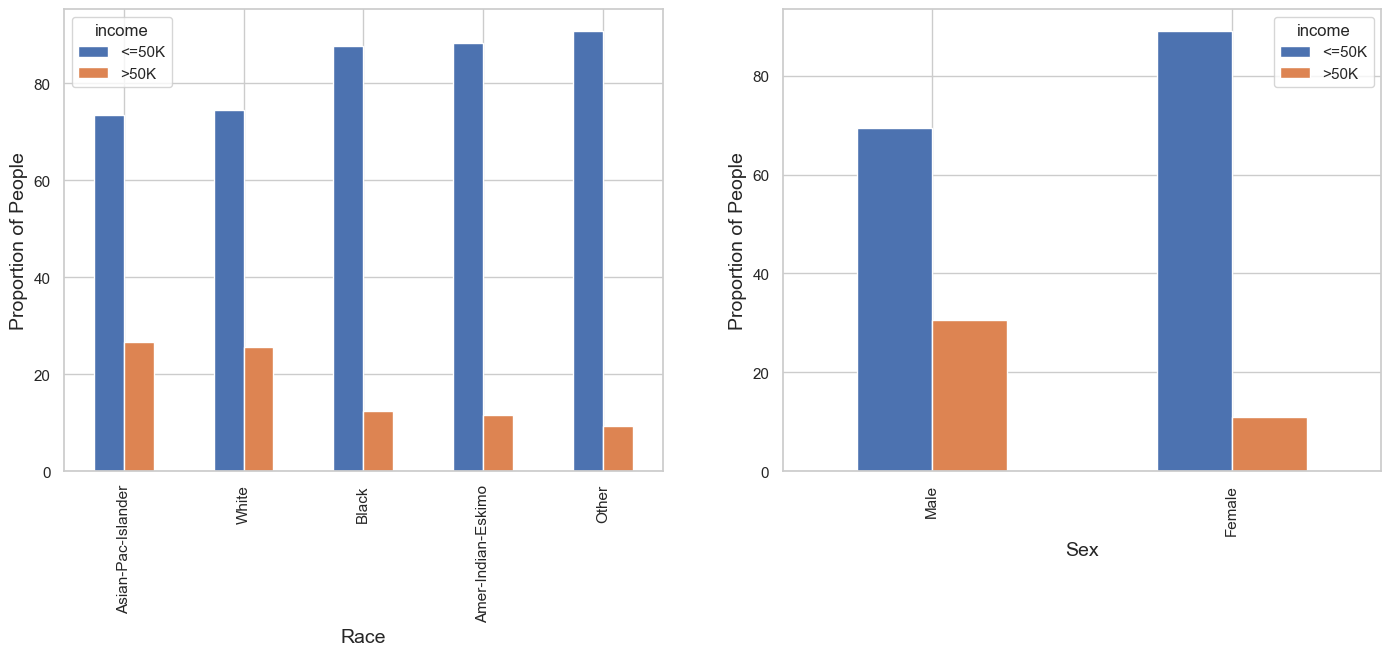

In [21]:
race = pd.crosstab(df['race'], df['income'])
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(race.div(race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

sex = pd.crosstab(df['sex'], df['income'])
ax = fig.add_subplot(1,2,2)
(sex.div(sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

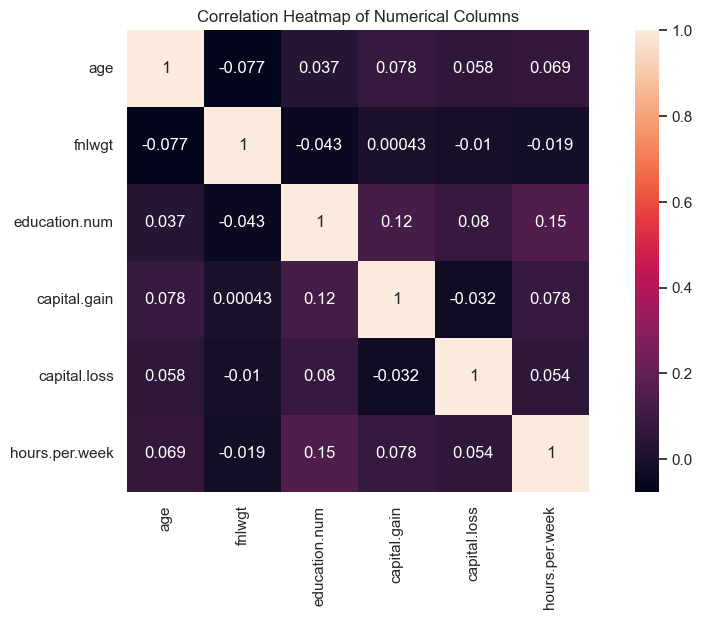

In [22]:
correlation_matrix = df[list(numerical_col.index)].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.title('Correlation Heatmap of Numerical Columns')

plt.show()

In [23]:
df.corr(numeric_only=True).T

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


- Age and Hours per week have strong correlation
- capital gain and hours per week have strong corr to

By examining the correlation coefficients, we can identify which features have the strongest (positive or negative) relationship with our "income" column. It is valuable for tasks for understanding the dataset, and building predictive models.

*   Positive Correlation:It indicates a strong positive relationship. 
*   Negative Correlation: If the correlation coefficient is close to -1, it indicates a strong negative relationship 
*   Weak Correlation: If the correlation coefficient is close to 0, it indicates a weak relationship between the two variables. 

## Preprocessing

cleaning and preprocessing, which are crucial steps before model training.

In [25]:
# Checking for the duplicates
df[df.duplicated()].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,Elementary,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [26]:
# Deleting the duplicates
df.drop_duplicates(inplace=True)

In [28]:
df[df.duplicated()]  #checking again

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


## Balancing the data

It is crucial because it ensures that the predictive model is not biased towards the majority class, leading to more accurate and fair predictions. When one class heavily outweighs the others, the model may become biased, neglecting the minority classes. This can result in poor performance. It enables the model to learn from all classes equally and produce more reliable predictions across the board.

In [29]:
from sklearn.utils import resample

print(df['income'].value_counts())

income
<=50K    24697
>50K      7839
Name: count, dtype: int64


In [30]:
major_data = df[df['income'] == '<=50K']
minor_data = df[df['income'] == '>50K']

downsampled_major_data = resample(major_data, replace=False, n_samples=11687, random_state=123)

df = pd.concat([downsampled_major_data, minor_data])

this part performs downsampling on the majority class (<=50K income) to balance it with the minority class (>50K income) in the dataset. It randomly selects a subset of the majority class data, ensuring that both classes are represented equally before concatenating them into a balanced dataset for further analysis or modeling.

In [31]:
print(df['income'].value_counts())

income
<=50K    11687
>50K      7839
Name: count, dtype: int64


## Normalization, Standartization, and One-hot encoding

Data normalization and feature engineering are key steps in building effective models

In [32]:
features_to_norm = {
    'age': 'standartization', 'workclass': 'onehot', 'fnlwgt': 'normalization', 'education': 'onehot', 
    'education.num': 'standartization', 'marital.status': 'onehot', 'occupation': 'onehot', 'relationship': 'onehot', 
    'race': 'onehot', 'sex': 'onehot', 'capital.gain': 'normalization', 'capital.loss': 'normalization', 
    'hours.per.week': 'standartization', 'native.country': 'onehot', 'income': 'onehot'
}

def df_norm(df):
  result = df.copy()
  for feature_name in df.columns:
    if features_to_norm[feature_name] == "normalization":
      max_val = df[feature_name].max()
      min_val = df[feature_name].min()
      result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)
    if features_to_norm[feature_name] == "standartization":
      mean_val = df[feature_name].mean()
      std_val = df[feature_name].std()
      result[feature_name] = (df[feature_name] - mean_val) / std_val
    if features_to_norm[feature_name] == "onehot":
      dummies = pd.get_dummies(df[[feature_name]])
      result = pd.concat([result, dummies], axis=1)
      result = result.drop([feature_name], axis=1)
  return result


It is for data preprocessing, specifically for normalizing, standardizing, and one-hot encoding features in a dataset.

In [33]:
norm_df = df_norm(df)
norm_arr = norm_df.to_numpy()
norm_df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Government Employees,workclass_Never-worked,workclass_Private,workclass_Self Employed,...,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Unknown,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
21853,-1.492495,0.155077,-0.926818,0.0,0.0,-0.127631,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
14211,2.503579,0.108159,-2.845911,0.0,0.0,-1.776794,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
15476,0.920229,0.122246,-0.159181,0.0,0.0,1.521531,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
19294,-1.115507,0.149587,-1.310637,0.0,0.0,-0.127631,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
13794,-1.492495,0.192791,-0.542999,0.0,0.0,0.284659,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [34]:
numeric_df = norm_df.select_dtypes(include=[np.number]) # I have dropped non-numeric columns

corr = numeric_df.corr(method='pearson') # Computing correlation again

%timeit corr
corr

16.9 ns ± 0.708 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.071975,0.062418,0.084856,0.060628,0.058888
fnlwgt,-0.071975,1.000000,-0.037447,0.002179,-0.007458,-0.009859
education.num,0.062418,-0.037447,1.000000,0.136078,0.097060,0.167578
capital.gain,0.084856,0.002179,0.136078,1.000000,-0.043828,0.087470
capital.loss,0.060628,-0.007458,0.097060,-0.043828,1.000000,0.059135
hours.per.week,0.058888,-0.009859,0.167578,0.087470,0.059135,1.000000


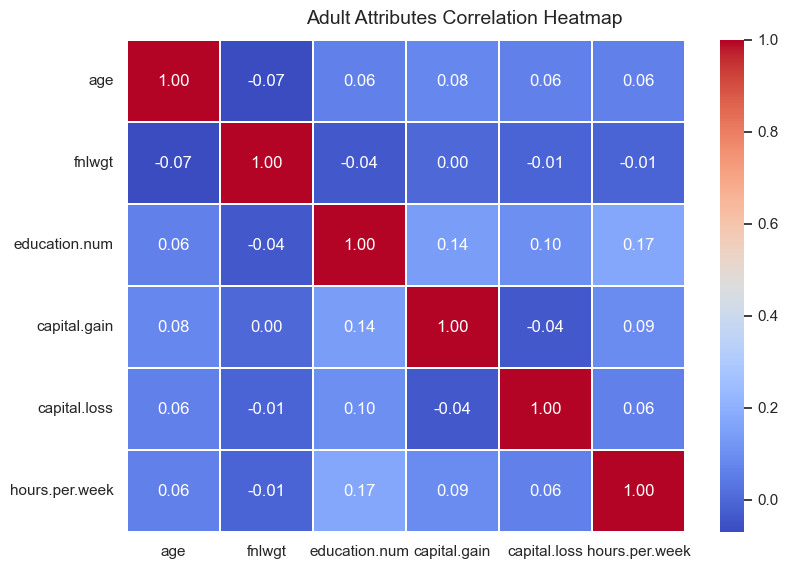

In [35]:
f, ax = plt.subplots(figsize=(9, 6))
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Adult Attributes Correlation Heatmap', fontsize=14)

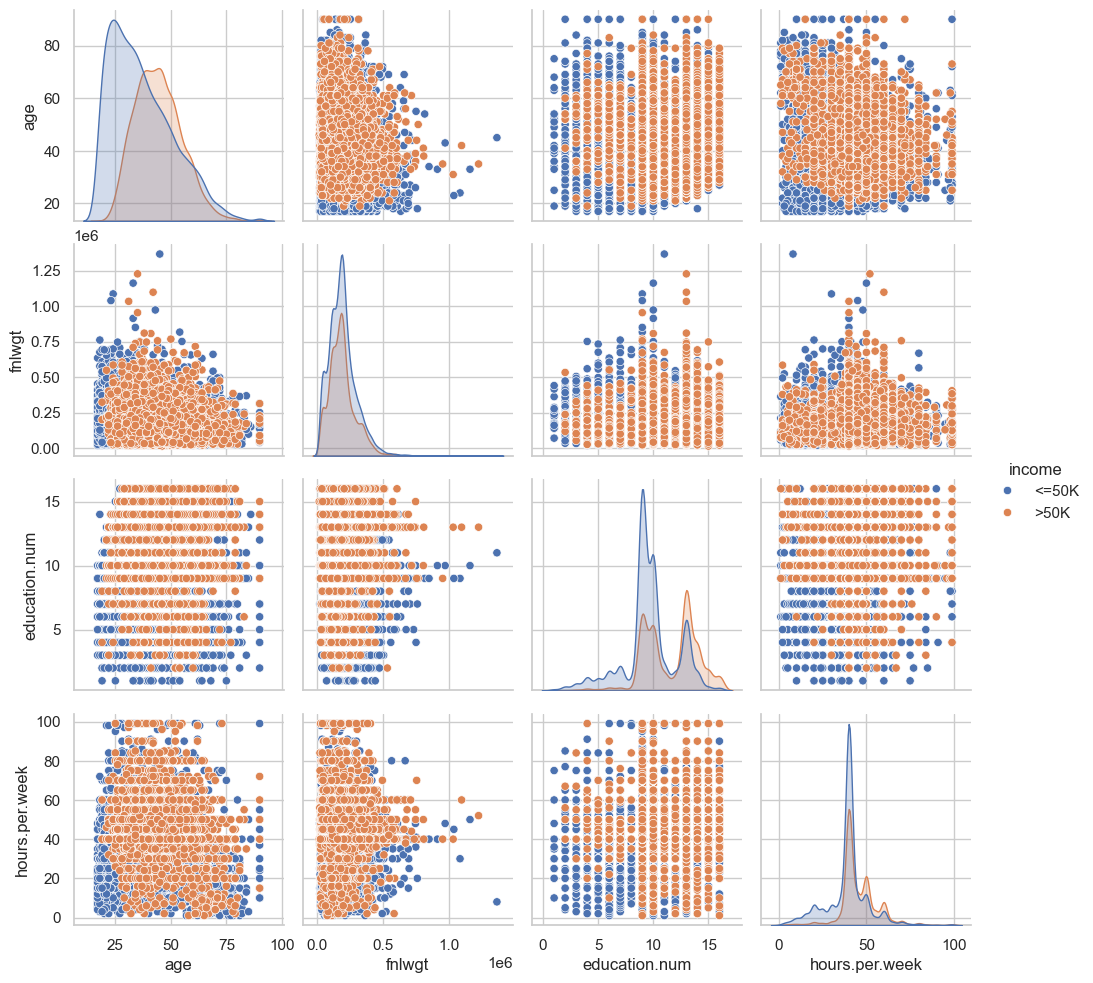

In [36]:
sns.pairplot(df, hue='income', vars=['age', 'fnlwgt', 'education.num', 'hours.per.week'])

## Splitting dataset into train and test sets

In [39]:
from sklearn.model_selection import train_test_split

income_names = ['income_<=50K', 'income_>50K']

X = norm_df.drop(income_names, axis=1).to_numpy()
Y = norm_df[income_names].to_numpy()
print("X shape: " + str(X.shape))
print("Y shape: " + str(Y.shape))
print("--------------------------------")

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=42)
print("Training X shape: " + str(x_train.shape))
print("Training Y shape: " + str(y_train.shape))
print("--------------------------------")
print("Test X shape: " + str(x_test.shape))
print("Test Y shape: " + str(y_test.shape))

X shape: (19526, 97)
Y shape: (19526, 2)
--------------------------------
Training X shape: (12691, 97)
Training Y shape: (12691, 2)
--------------------------------
Test X shape: (6835, 97)
Test Y shape: (6835, 2)


- I identified the target variables 'income_<=50K' and 'income_>50K' which indicate whether an individual's income is less than or equal to 50K, respectively.
- I split the dataset into features(X) and target(Y) variables. The features used for prediction, while the target variables represent the dependent variables that aim to predict.

## Models

In [40]:
#important libraries are imported
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [42]:
# SVM
svm = SVC(kernel='rbf', C=1e3, gamma=0.1)
svm_model = MultiOutputClassifier(estimator=svm)

# RF
rf = RandomForestClassifier(n_estimators=10)
rf_model = MultiOutputClassifier(estimator=rf)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree_model = MultiOutputClassifier(estimator=dtree)

# KNN
knn = KNeighborsClassifier()
knn_model = MultiOutputClassifier(estimator=knn)

# Naive Bayes
nb = GaussianNB()
nb_model = MultiOutputClassifier(estimator=nb)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# GBC
gbc = GradientBoostingClassifier()
gbc_model = MultiOutputClassifier(estimator=gbc)

#### This part initializes classifiers for a multi-output classification task. SVM, Random Forest, Decision Tree, KNN, and Naive Bayes classifiers are set up using scikit-learn's MultiOutputClassifier. Each classifier is capable of handling multiple target variables simultaneously, making them suitable for multi-output classification tasks.

## Fitting Models

In [43]:
# SVM
svm_model.fit(x_train, y_train)

# RF
rf_model.fit(x_train, y_train)

# DecisionTree
dtree_model.fit(x_train, y_train)

# KNN
knn_model.fit(x_train, y_train)


# Naive Bayes
nb_model.fit(x_train, y_train)


MultiOutputClassifier(estimator=GaussianNB())

In [46]:
gbc_model.fit(x_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

- It is also used for its ability to sequentially train weak learners, typically decision trees, in a manner that focuses on the instances where previous models have struggled. 

- Gradient Boosting constructs a strong ensemble model that excels at predictive accuracy. Additionally, it is less prone to overfitting compared to other ensemble methods.

## Model Evaluation

In [47]:
from sklearn.metrics import accuracy_score

In [63]:
# SVM
svm_pred = svm_model.predict(x_test)
svm_test_accuracy = accuracy_score(y_test, svm_pred)
print('SVM Test accuracy: %.3f' % ( svm_test_accuracy))

# DecisionTree
dt_pred = dtree_model.predict(x_test)
dt_test_accuracy = accuracy_score(y_test, dt_pred)
print('DecisionTree Test accuracy: %.3f' % ( dt_test_accuracy))

# RF
rf_pred = rf_model.predict(x_test)
rf_test_accuracy = accuracy_score(y_test, rf_pred)
print('RF Test accuracy: %.3f' % ( rf_test_accuracy))

# KNN
knn_pred = knn_model.predict(x_test)
knn_test_accuracy = accuracy_score(y_test, knn_pred)
print('KNN Test accuracy: %.3f' % ( knn_test_accuracy))

# Naive Bayes
nb_pred = nb_model.predict(x_test)
nb_test_accuracy = accuracy_score(y_test, nb_pred)
print('Naive Bayes Test accuracy: %.3f' % ( nb_test_accuracy))

# GBC
gbc_pred = gbc_model.predict(x_test)
gbc_test_accuracy = accuracy_score(y_test, gbc_pred)
print('GBC Test accuracy: %.3f' % ( gbc_test_accuracy))


SVM Test accuracy: 0.784
DecisionTree Test accuracy: 0.753
RF Test accuracy: 0.752
KNN Test accuracy: 0.775
Naive Bayes Test accuracy: 0.598
GBC Test accuracy: 0.831


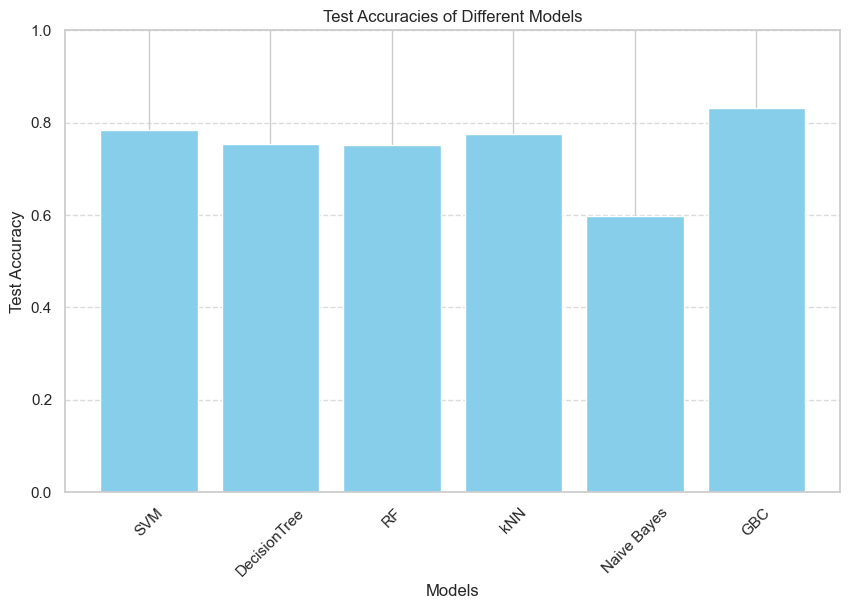

In [64]:

models = ['SVM', 'DecisionTree', 'RF', 'kNN', 'Naive Bayes', 'GBC']
test_accuracies = [svm_test_accuracy, dt_test_accuracy, rf_test_accuracy, knn_test_accuracy, nb_test_accuracy, gbc_test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Different Models')
plt.ylim(0.0, 1.0)  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


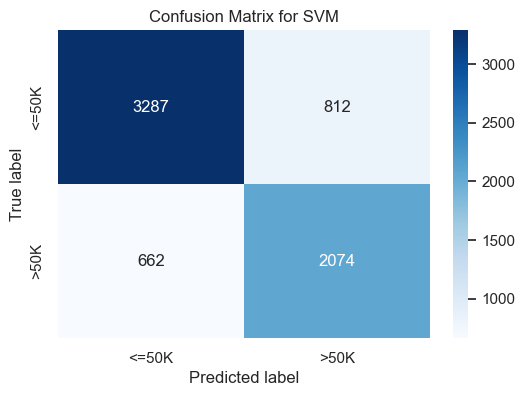

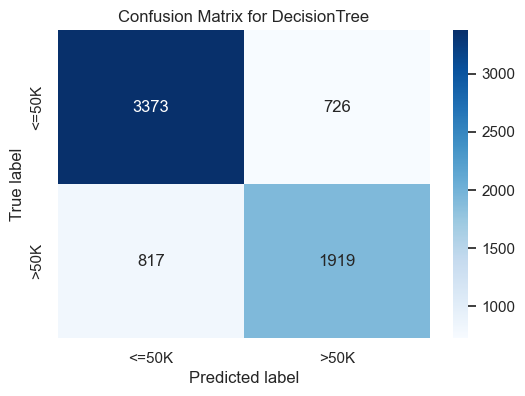

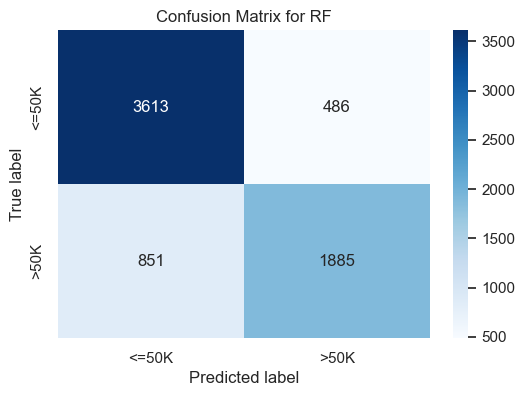

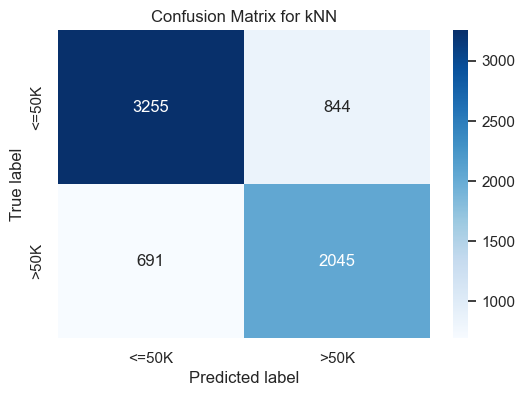

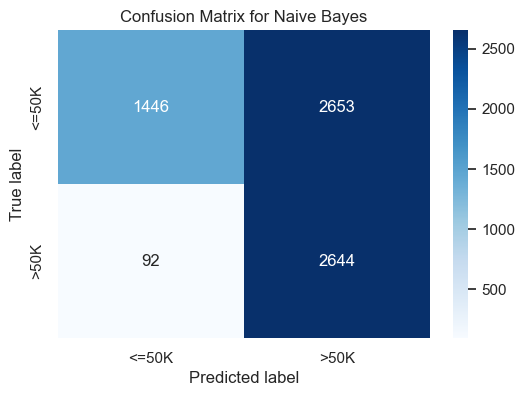

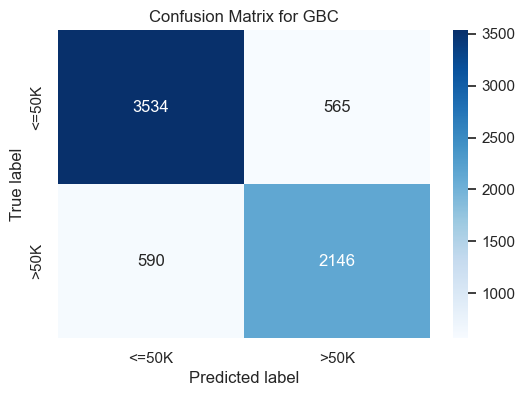

In [65]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# I am calculating confusion matrix for each model and plot it
for model_name, pred in zip(['SVM', 'DecisionTree', 'RF', 'kNN', 'Naive Bayes','GBC'], [svm_pred, dt_pred, rf_pred, knn_pred, nb_pred, gbc_pred]):
    cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
    plot_confusion_matrix(model_name, cm)


In [66]:
def calculate_metrics(cm):
    # True Positive (TP), False Negative (FN), False Positive (FP), True Negative (TN)
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    TN = cm[0, 0]
    
    # Accuracy, Recall (Sensitivity), Specificity, Precision, F1 Score
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, recall, specificity, precision, f1_score


In [68]:
# Calculation of metrics for each model
for model_name, pred in zip(['SVM', 'DecisionTree', 'RF', 'kNN', 'Naive Bayes', 'GBC'], [svm_pred, dt_pred, rf_pred, knn_pred, nb_pred, gbc_pred]):
    cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
    accuracy, recall, specificity, precision, f1_score = calculate_metrics(cm)
    print(f"{model_name} - Accuracy: {accuracy:.3f}")
    print(f"{model_name} - Recall (Sensitivity): {recall:.3f}")
    print(f"{model_name} - Specificity: {specificity:.3f}")
    print(f"{model_name} - Precision: {precision:.3f}")
    print(f"{model_name} - F1 Score: {f1_score:.3f}")
    print()


SVM - Accuracy: 0.784
SVM - Recall (Sensitivity): 0.758
SVM - Specificity: 0.802
SVM - Precision: 0.719
SVM - F1 Score: 0.738

DecisionTree - Accuracy: 0.774
DecisionTree - Recall (Sensitivity): 0.701
DecisionTree - Specificity: 0.823
DecisionTree - Precision: 0.726
DecisionTree - F1 Score: 0.713

RF - Accuracy: 0.804
RF - Recall (Sensitivity): 0.689
RF - Specificity: 0.881
RF - Precision: 0.795
RF - F1 Score: 0.738

kNN - Accuracy: 0.775
kNN - Recall (Sensitivity): 0.747
kNN - Specificity: 0.794
kNN - Precision: 0.708
kNN - F1 Score: 0.727

Naive Bayes - Accuracy: 0.598
Naive Bayes - Recall (Sensitivity): 0.966
Naive Bayes - Specificity: 0.353
Naive Bayes - Precision: 0.499
Naive Bayes - F1 Score: 0.658

GBC - Accuracy: 0.831
GBC - Recall (Sensitivity): 0.784
GBC - Specificity: 0.862
GBC - Precision: 0.792
GBC - F1 Score: 0.788



### And it is the tabulate version of results:

In [69]:
from tabulate import tabulate

# Initialize an empty list to store the metrics for each model
metrics_table = []

# Calculate and append metrics for each model to the table
for model_name, pred in zip(['SVM', 'DecisionTree', 'RF', 'kNN', 'Naive Bayes', 'GBC'], [svm_pred, dt_pred, rf_pred, knn_pred, nb_pred, gbc_pred]):
    cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
    accuracy, recall, specificity, precision, f1_score = calculate_metrics(cm)
    metrics_table.append([model_name, accuracy, recall, specificity, precision, f1_score])

# Print the table
print(tabulate(metrics_table, headers=["Model", "Accuracy", "Recall (Sensitivity)", "Specificity", "Precision", "F1 Score"], tablefmt="pretty"))


+--------------+--------------------+----------------------+--------------------+---------------------+--------------------+
|    Model     |      Accuracy      | Recall (Sensitivity) |    Specificity     |      Precision      |      F1 Score      |
+--------------+--------------------+----------------------+--------------------+---------------------+--------------------+
|     SVM      | 0.7843452816386247 |  0.7580409356725146  | 0.8019029031471091 | 0.7186417186417187  | 0.7378157239416578 |
| DecisionTree | 0.7742501828822238 |  0.7013888888888888  | 0.822883630153696  | 0.7255198487712665  | 0.713250325218361  |
|      RF      | 0.8043891733723482 |  0.6889619883040936  | 0.8814344962185899 | 0.7950231969633066  | 0.7382024672018798 |
|     kNN      |  0.77542062911485  |  0.7474415204678363  | 0.7940961210051232 | 0.7078573901003807  | 0.7271111111111112 |
| Naive Bayes  | 0.598390636430139  |  0.966374269005848   | 0.3527689680409856 | 0.49915046252595807 | 0.6582845761234906 |


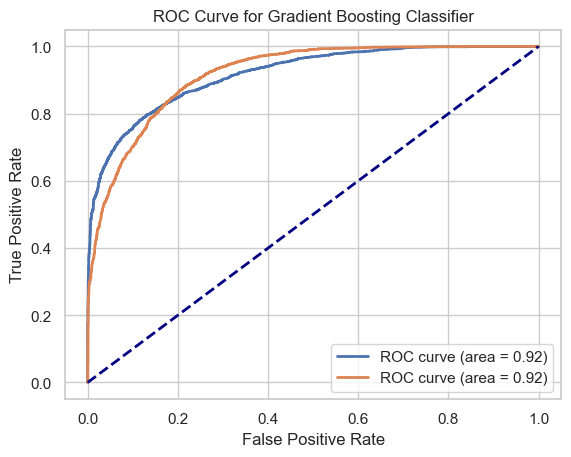

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test is your true labels for the test data
# Get predicted probabilities for positive class
gbc_probs = gbc_model.predict_proba(x_test)

# Extract probabilities for the positive class
gbc_probs_pos = [pred[:, 1] for pred in gbc_probs]

# Calculate ROC curve and AUC for each output
plt.figure()
for i in range(len(gbc_probs_pos)):
    fpr, tpr, _ = roc_curve(y_test[:, i], gbc_probs_pos[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()


The GBC model represented here appears to be performing very well, given the high AUC of 0.92, which is significantly better than a random guess (AUC = 0.5). However, to fully evaluate the model, I also want to consider other metrics such as precision, the confusion matrix, and, depending on the application, the cost/benefit of false positives vs false negatives.

What I can interpret from the ROC curve is that: True Positive Rate, False Positive Rate, Curve and Area Under the Curve (AUC), which represents the trade-off between TPR and FPR 

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. 
An AUC of 0.92, which both curves in the graph have, indicates a very good level of discrimination.
Since there are two curves with identical AUC values, it suggests that they may represent different models or model settings that perform equally well according to the AUC metric. 

#### Gradient Boosted Classifier model appears to perform the best among the evaluated models, achieving the highest accuracy and a good balance between precision and recall. However, it's essential to consider the specific requirements and constraints of the problem domain when selecting the most suitable model.

Almost all features seem to have an impact on the result.

Potential Flaws:

There may be overfitting, which is a common flaw in machine learning models, along with considerations for feature selection and next steps for improvement on this assignment. Although the Gradient Boosting is less prone to overfitting compared to other ensemble methods,overfitting could still be a concern that needs to be monitored.

A plan of action to revisit this analysis:

There is an implication that the models' robustness could be further tested by examining more metrics beyond just AUC and accuracy, and by using techniques like cross-validation to assess the model's generalizability.  Or maybe withh different predictive models.